In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
from keras.utils import to_categorical
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import load_model


In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_filter = train_y < 4
test_filter = test_y < 4

train_X = train_X[train_filter]
train_y = train_y[train_filter]
test_X = test_X[test_filter]
test_y = test_y[test_filter]

train_X = np.expand_dims(train_X, axis=-1)  # Add a channel dimension for ResNet50
train_X = np.repeat(train_X, 3, axis=-1)  # Repeat the single channel to simulate 3 channels
train_X = np.pad(train_X, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')  # Resize to 224x224
train_y = to_categorical(train_y, 4)

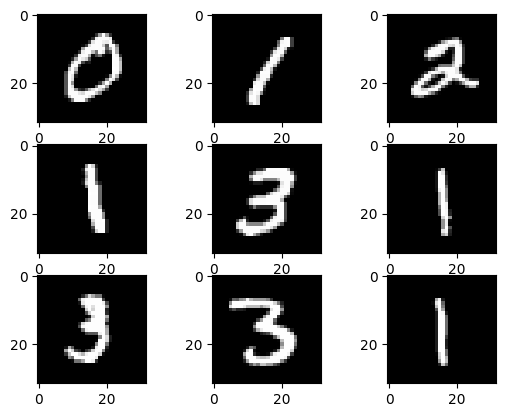

In [3]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

In [4]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(4, activation='softmax'))

model.layers[0].trainable=False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 8,196
Non-trainable params: 23,587,712
_________________________________________________________________


In [5]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x = train_X, y= train_y, epochs=10)

Epoch 1/10
774/774 [==============================] - 71s 85ms/step - loss: 0.1741 - accuracy: 0.9431
Epoch 2/10
774/774 [==============================] - 64s 83ms/step - loss: 0.0703 - accuracy: 0.9766
Epoch 3/10
774/774 [==============================] - 65s 83ms/step - loss: 0.0573 - accuracy: 0.9808
Epoch 4/10
774/774 [==============================] - 64s 83ms/step - loss: 0.0510 - accuracy: 0.9833
Epoch 5/10
774/774 [==============================] - 65s 84ms/step - loss: 0.0435 - accuracy: 0.9862
Epoch 6/10
774/774 [==============================] - 66s 85ms/step - loss: 0.0401 - accuracy: 0.9866
Epoch 7/10
774/774 [==============================] - 65s 84ms/step - loss: 0.0357 - accuracy: 0.9875
Epoch 8/10
774/774 [==============================] - 65s 84ms/step - loss: 0.0368 - accuracy: 0.9874
Epoch 9/10
774/774 [==============================] - 66s 85ms/step - loss: 0.0336 - accuracy: 0.9886
Epoch 10/10
774/774 [==============================] - 65s 84ms/step - loss: 0.033

In [7]:
model.save('NN/model_mnist_renet50_4_categories.h5')

In [10]:
model_final = load_model('NN/model_mnist_renet50_4_categories.h5')
test_X = np.expand_dims(test_X, axis=-1)  # Add a channel dimension for ResNet50
test_X = np.repeat(test_X, 3, axis=-1)  # Repeat the single channel to simulate 3 channels
test_X = np.pad(test_X, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')  # Resize to 224x224
result = model_final.evaluate(test_X, to_categorical(test_y, 4))
print(result)

130/130 [==============================] - 13s 86ms/step - loss: 0.0382 - accuracy: 0.9885
[0.03815601393580437, 0.988453209400177]


In [11]:
pred = model_final.predict(test_X[9:10])

1/1 [==============================] - 2s 2s/step


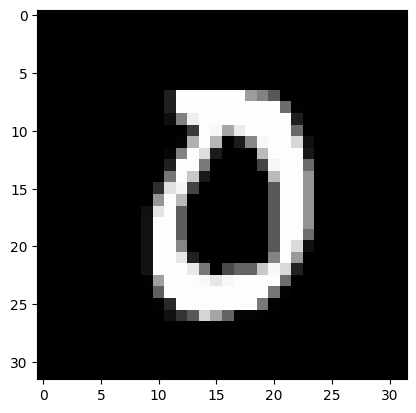

In [12]:
pyplot.imshow(test_X[9], cmap=pyplot.get_cmap('gray'))

In [13]:
np.argmax(pred[0])

0